# **Handling Missing Data**

In [8]:
import pandas as pd
import numpy as np

# Creating DataFrame with missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, np.nan, np.nan, 8, 9],
    'C': [10, 11, 12, np.nan, 14],
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
     A    B     C
0  1.0  5.0  10.0
1  2.0  NaN  11.0
2  NaN  NaN  12.0
3  4.0  8.0   NaN
4  5.0  9.0  14.0


# **Filling Missing Values**

In [9]:
df_filled = df.fillna(0)
print("\nDataFrame with missing values filled with 0:")
print(df_filled)

df_filled_mean = df.fillna(df.mean())     # Fill missing values with the mean of the column
print("\nDataFrame with missing values filled with column mean:")
print(df_filled_mean)


DataFrame with missing values filled with 0:
     A    B     C
0  1.0  5.0  10.0
1  2.0  0.0  11.0
2  0.0  0.0  12.0
3  4.0  8.0   0.0
4  5.0  9.0  14.0

DataFrame with missing values filled with column mean:
     A         B      C
0  1.0  5.000000  10.00
1  2.0  7.333333  11.00
2  3.0  7.333333  12.00
3  4.0  8.000000  11.75
4  5.0  9.000000  14.00


# **Replacing Values**

In [10]:
df_replaced = df.replace(np.nan, -1)
print("\nDataFrame with missing values replaced by -1:")
print(df_replaced)


DataFrame with missing values replaced by -1:
     A    B     C
0  1.0  5.0  10.0
1  2.0 -1.0  11.0
2 -1.0 -1.0  12.0
3  4.0  8.0  -1.0
4  5.0  9.0  14.0


# **Removing Duplicates**

In [11]:
data = {
    'A': [1, 2, 2, 4, 5],
    'B': [5, 6, 6, 8, 9],
    'C': [10, 11, 11, 13, 14],
}
df_duplicates = pd.DataFrame(data)
print("\nOriginal DataFrame with duplicates:")
print(df_duplicates)

df_no_duplicates = df_duplicates.drop_duplicates()
print("\nDataFrame with duplicates removed:")
print(df_no_duplicates)


Original DataFrame with duplicates:
   A  B   C
0  1  5  10
1  2  6  11
2  2  6  11
3  4  8  13
4  5  9  14

DataFrame with duplicates removed:
   A  B   C
0  1  5  10
1  2  6  11
3  4  8  13
4  5  9  14


# **Detecting and Removing Outliers using Z-score**

In [12]:
from scipy.stats import zscore

# Creating DataFrame
data = {
    'A': [1, 2, 3, 4, 5, 100],
    'B': [5, 6, 7, 8, 9, 100],
    'C': [10, 11, 12, 13, 14, 100],
}
df_outliers = pd.DataFrame(data)
print("\nOriginal DataFrame with outliers:")
print(df_outliers)

z_scores = np.abs(zscore(df_outliers))
print("\nZ-scores of the DataFrame:")
print(z_scores)

threshold = 3
outliers = (z_scores > threshold)

df_no_outliers = df_outliers[(z_scores < threshold).all(axis=1)]
print("\nDataFrame with outliers removed using Z-score:")
print(df_no_outliers)


Original DataFrame with outliers:
     A    B    C
0    1    5   10
1    2    6   11
2    3    7   12
3    4    8   13
4    5    9   14
5  100  100  100

Z-scores of the DataFrame:
          A         B         C
0  0.502219  0.504569  0.507804
1  0.474574  0.475736  0.477336
2  0.446929  0.446904  0.446867
3  0.419284  0.418071  0.416399
4  0.391639  0.389239  0.385931
5  2.234643  2.234518  2.234337

DataFrame with outliers removed using Z-score:
     A    B    C
0    1    5   10
1    2    6   11
2    3    7   12
3    4    8   13
4    5    9   14
5  100  100  100


# **Detecting and Removing Outliers using IQR**

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = ((df_outliers < (Q1 - 1.5 * IQR)) | (df_outliers > (Q3 + 1.5 * IQR)))
print("\nOutliers detected using IQR method:")
print(outliers_IQR)

df_no_outliers_IQR = df_outliers[~((df_outliers < (Q1 - 1.5 * IQR)) | (df_outliers > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nDataFrame with outliers removed using IQR method:")
print(df_no_outliers_IQR)


Outliers detected using IQR method:
       A      B      C
0  False  False  False
1  False  False  False
2  False  False  False
3  False  False  False
4  False  False  False
5   True   True   True

DataFrame with outliers removed using IQR method:
   A  B   C
0  1  5  10
1  2  6  11
2  3  7  12
3  4  8  13
4  5  9  14


# **Decision Tree for Classification**

Accuracy: 1.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



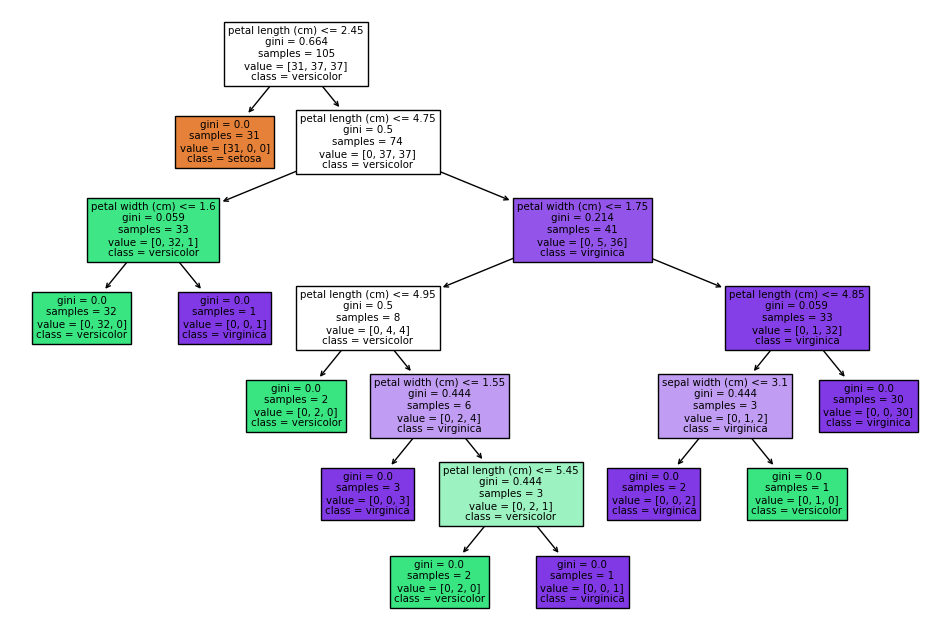

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Loading Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the model
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ploting the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# **Decision Tree for Regression**

Mean Squared Error: 0.5280096503174904
R-squared: 0.5977192261218356


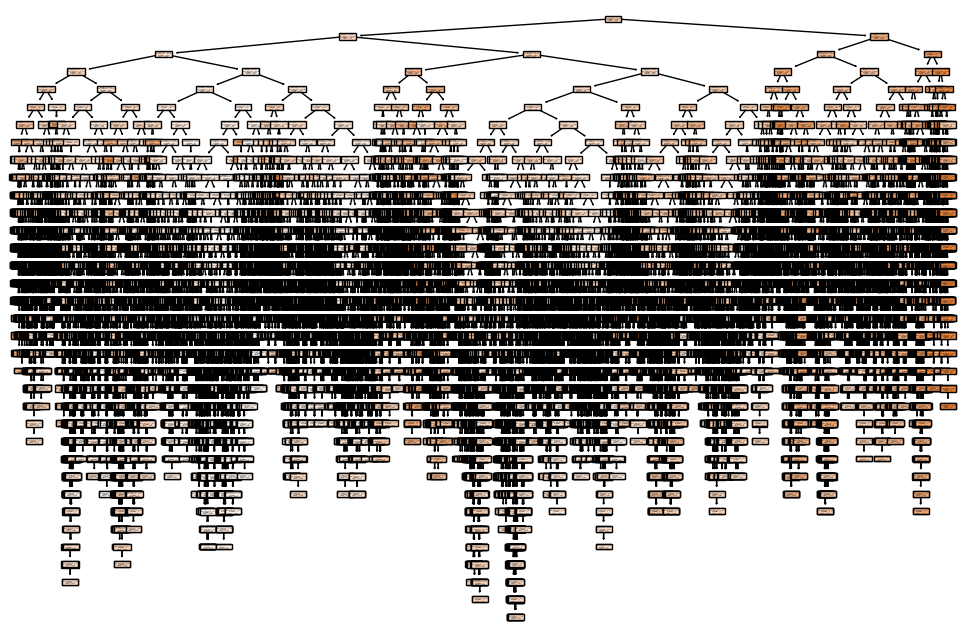

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

#Loading the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

#Spliting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Creating Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)

#Training the model
reg.fit(X_train, y_train)

#Predictions
y_pred = reg.predict(X_test)

#Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#Ploting the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(reg, filled=True, feature_names=housing.feature_names)
plt.show()